# Recommendation System on MovieLens dataset

In [1]:
import pandas as pd

## Dataset Exploration

In [2]:
ratings = pd.read_csv('../data/ml-100k/u.data', sep='\t', 
                      names=['user_id', 'item_id', 'rating', 'timestamp'])

In [3]:
ratings

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
...,...,...,...,...
99995,880,476,3,880175444
99996,716,204,5,879795543
99997,276,1090,1,874795795
99998,13,225,2,882399156


In [4]:
n_users = ratings['user_id'].nunique()
n_items = ratings['item_id'].nunique()
n_users, n_items, len(ratings)

(943, 1682, 100000)

<Axes: title={'center': 'Ratings Distribution'}, xlabel='rating'>

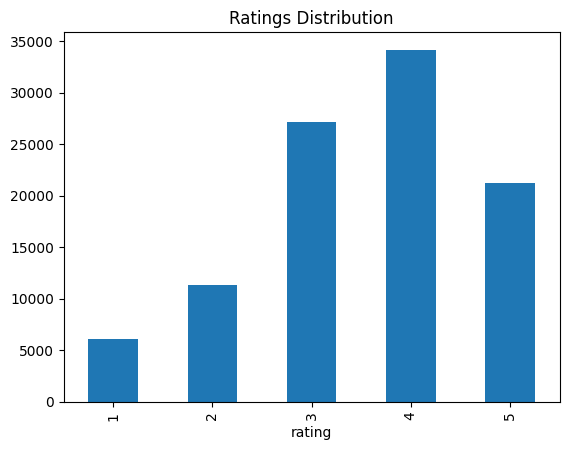

In [5]:
# Ratings distribution
ratings['rating'].value_counts().sort_index().plot(kind='bar', title='Ratings Distribution')

<Axes: >

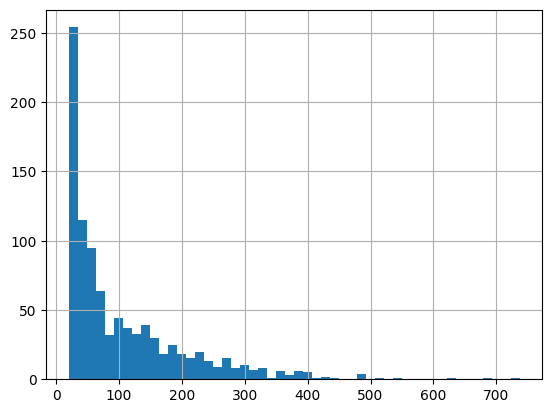

In [6]:
# Ratings per user
ratings.groupby('user_id').size().hist(bins=50)

<Axes: >

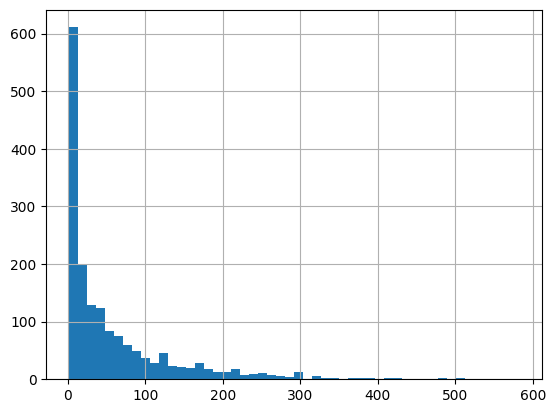

In [7]:
# Ratings per movie
ratings.groupby('item_id').size().hist(bins=50)

<Axes: >

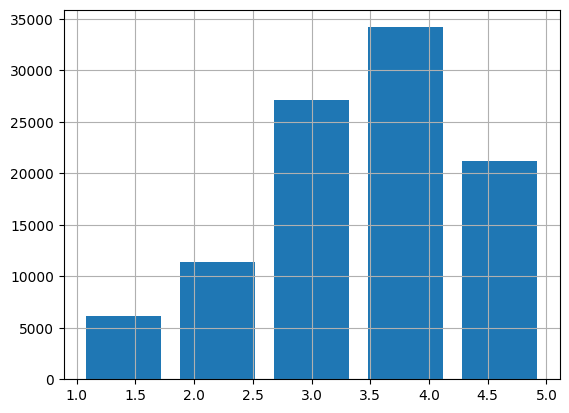

In [8]:
# Histogram of ratings
ratings['rating'].hist(bins=5, rwidth=0.8)

<Axes: >

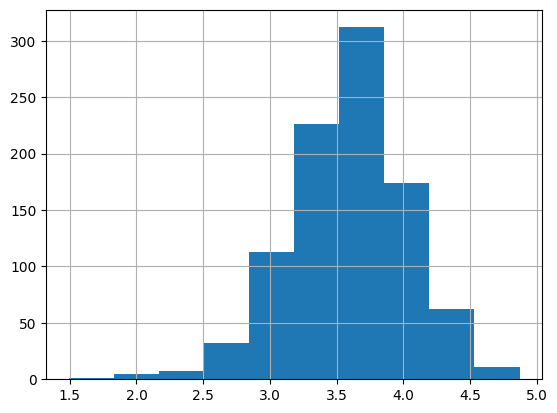

In [9]:
# Mean rating per user
ratings.groupby('user_id')['rating'].mean().hist()

<Axes: >

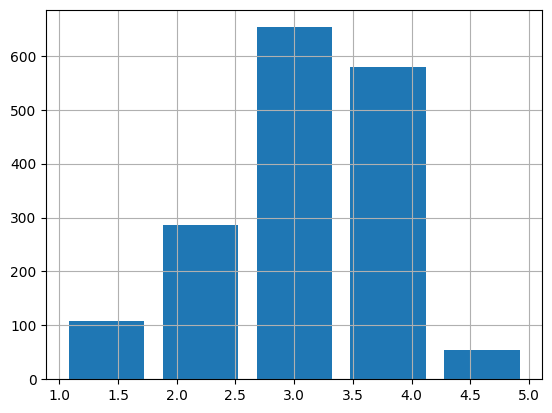

In [10]:
# Mean rating per movie
ratings.groupby('item_id')['rating'].mean().hist(bins=5, rwidth=0.8)

In [11]:
# Sparity of the ratings matrix
sparisity = 1 - len(ratings)/(n_users*n_items)
sparisity

0.9369533063577546